In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('C:\\Users\\yasha\\OneDrive\\Desktop\\JUPYTERNOTEBOOK\\IMDb Movies India.csv\\IMDb Movies India.csv', encoding='latin1')

In [83]:
df.head(10000)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
9995,Nartakee,(1963),125 min,Drama,7.0,21,Nitin Bose,Sunil Dutt,Nanda,Om Prakash
9996,Nartaki,(1940),150 min,Drama,6.5,11,Debaki Bose,Leela Desai,Bhanu Bannerjee,Najmul Hussain
9997,Nartaki Chitra,(1965),NaN,Drama,NaN,NaN,Anjali Devi,Padmini,M.G. Ramachandran,NaN
9998,Nasbandi,(1978),140 min,"Comedy, Drama",6.5,13,I.S. Johar,Anitav Bachchan,Kanauj Kumar,Shahi Kapoor


In [84]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [86]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [87]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [88]:
df.shape

(15509, 10)

In [89]:
df.dropna(inplace=True)
df.head(60)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [90]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [91]:
df.shape

(5659, 10)

In [92]:
df["Year"].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [93]:
genre=df['Genre']
genre.head(10)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
Name: Genre, dtype: object

In [94]:
genres=df['Genre'].str.split(',',expand=True)
genres.head(10)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [95]:
from collections import Counter
genre_list = [genre for genre in genres.values.flatten() if genre is not None]
genre_counts = Counter(genre_list)
sorted_genre_counts = dict(sorted(genre_counts.items()))
for genre, count in sorted_genre_counts.items():
    print(f"{genre}: {count}")

 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [96]:
genresPie = df['Genre'].value_counts()
genresPie.head(55)

Genre
Drama                          844
Drama, Romance                 332
Action, Crime, Drama           329
Action, Drama                  206
Comedy, Drama                  205
Comedy, Drama, Romance         188
Comedy                         187
Action                         170
Drama, Family                  160
Romance                        126
Action, Comedy, Drama          118
Comedy, Romance                107
Action, Drama, Romance         107
Drama, Musical, Romance         93
Thriller                        84
Action, Comedy, Crime           74
Horror                          74
Action, Thriller                70
Comedy, Crime, Drama            53
Crime, Drama, Thriller          53
Drama, Thriller                 52
Comedy, Drama, Family           50
Crime, Drama, Mystery           49
Action, Drama, Thriller         49
Crime, Drama                    46
Comedy, Drama, Musical          45
Action, Crime, Thriller         45
Action, Adventure, Drama        43
Drama, Romance

In [97]:
genrePie = pd.DataFrame(genresPie.items(), columns=['Genre', 'Count'])
genrePie.head(25)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [98]:
df["Votes"] = df["Votes"].str.replace(',', '').astype(int)
df["Votes"].head(40)

1         8
3        35
5       827
6      1086
8       326
9        11
10       17
11       59
12      983
13      512
15     6619
18      162
21       72
22       63
25       26
28     6329
30     1002
32       15
33     1235
34       10
36       16
38     3100
39     1559
40     1811
41     1069
42     3223
43     1892
44       20
45      106
50       21
51       33
53    24034
54    21938
55      112
58       94
60        8
61       52
62      361
63      642
69      194
Name: Votes, dtype: int32

In [99]:
df["Director"].nunique()

2431

In [100]:
directors = df["Director"].value_counts()
directors.head(26)

Director
David Dhawan                41
Mahesh Bhatt                39
Ram Gopal Varma             33
Hrishikesh Mukherjee        33
Shakti Samanta              33
Vikram Bhatt                30
Priyadarshan                29
Basu Chatterjee             23
Rama Rao Tatineni           23
Shyam Benegal               22
Yash Chopra                 22
K. Bapaiah                  22
Kanti Shah                  21
Harmesh Malhotra            21
Shyam Ramsay                20
Manmohan Desai              19
Subhash Ghai                19
Ravikant Nagaich            18
Raj Khosla                  18
Mahesh Manjrekar            18
Abbas Alibhai Burmawalla    18
Raj N. Sippy                17
Gulzar                      17
Satyen Bose                 17
Babubhai Mistry             17
K. Raghavendra Rao          16
Name: count, dtype: int64

In [101]:
actors = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().dropna().value_counts()
actors.head(13)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Ajay Devgn             92
Rekha                  92
Govinda                90
Rishi Kapoor           88
Naseeruddin Shah       87
Name: count, dtype: int64

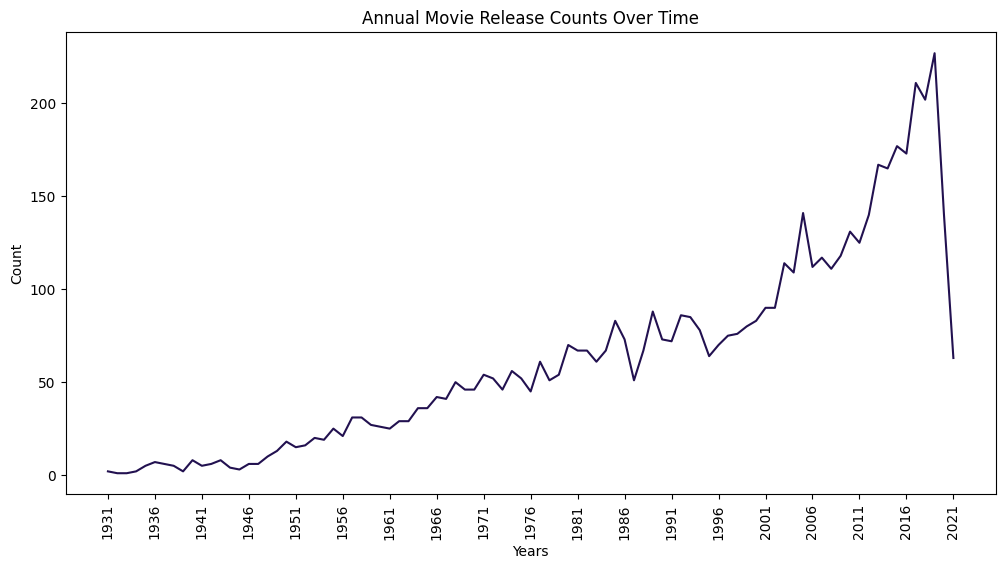

In [102]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(float).astype(int)
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
ax.set(title="Annual Movie Release Counts Over Time",
       xlabel="Years",
       ylabel="Count")
ax.set_xticks(range(yearly_counts.index.min(), yearly_counts.index.max() + 1, 5))
plt.xticks(rotation=90)
plt.show()

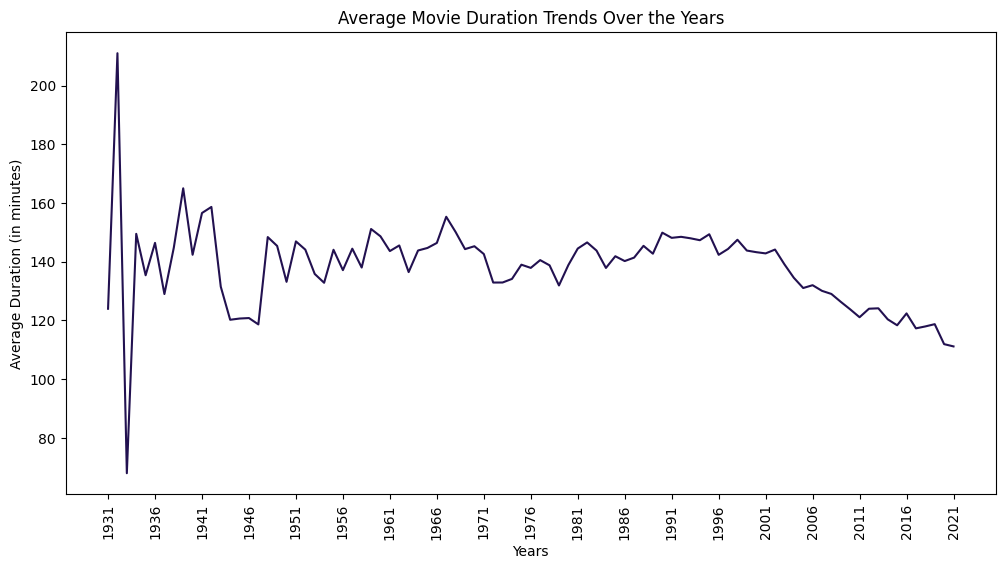

In [103]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)
average_durations = df.groupby('Year')['Duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=average_durations, x='Year', y='Duration')
ax.set(title="Average Movie Duration Trends Over the Years",
       xlabel="Years",
       ylabel="Average Duration (in minutes)")
ax.set_xticks(range(int(min(average_durations['Year'])), int(max(average_durations['Year'])) + 1, 5))
plt.xticks(rotation=90)
plt.show()

In [104]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


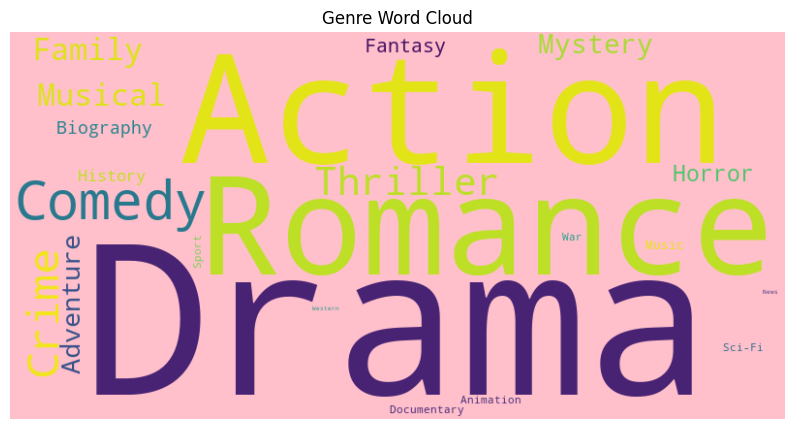

In [105]:
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='pink').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

C:\Users\yasha\AppData\Local\Temp\ipykernel_3692\983112596.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



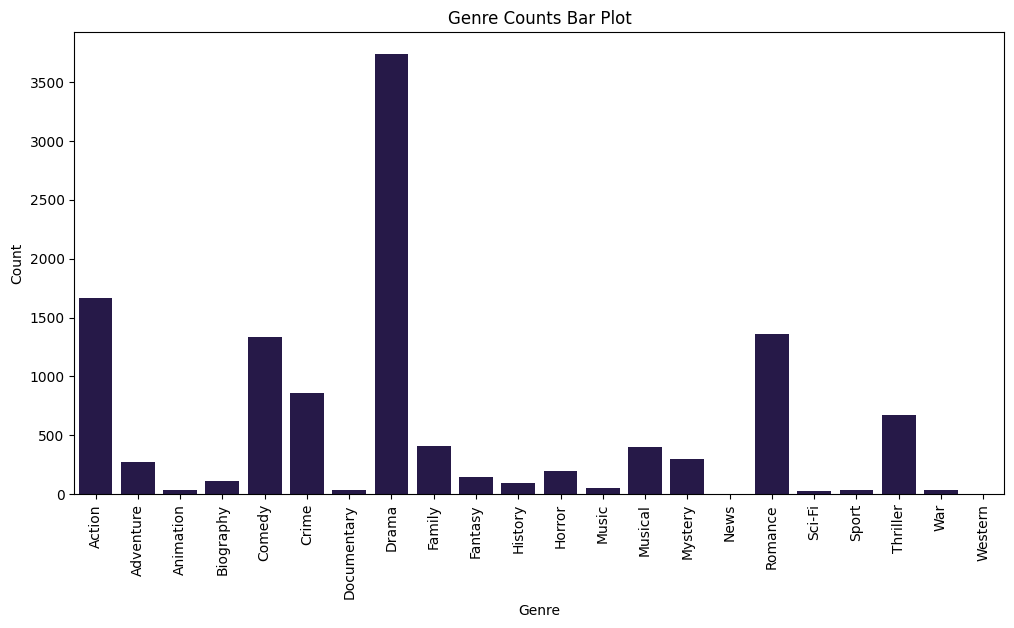

In [106]:
genreLabels = sorted(genre_counts.keys())
genreCounts = [genre_counts[label] for label in genreLabels]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation=90)
ax.set_title("Genre Counts Bar Plot")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.show()

In [107]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'

fig = px.pie(
    genrePie,
    values='Count',
    names='Genre',
    title='Movie Genres in Indian Cinema'
)

fig.show()

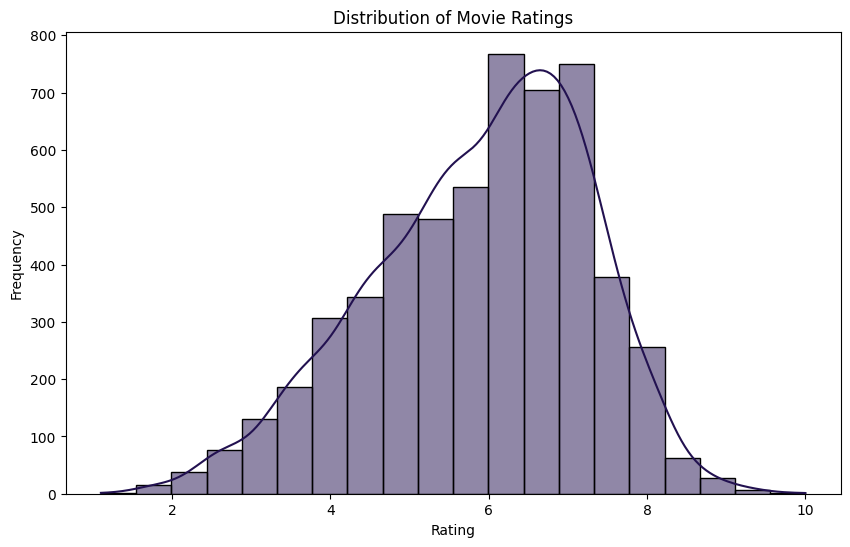

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Rating", bins=20, kde=True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

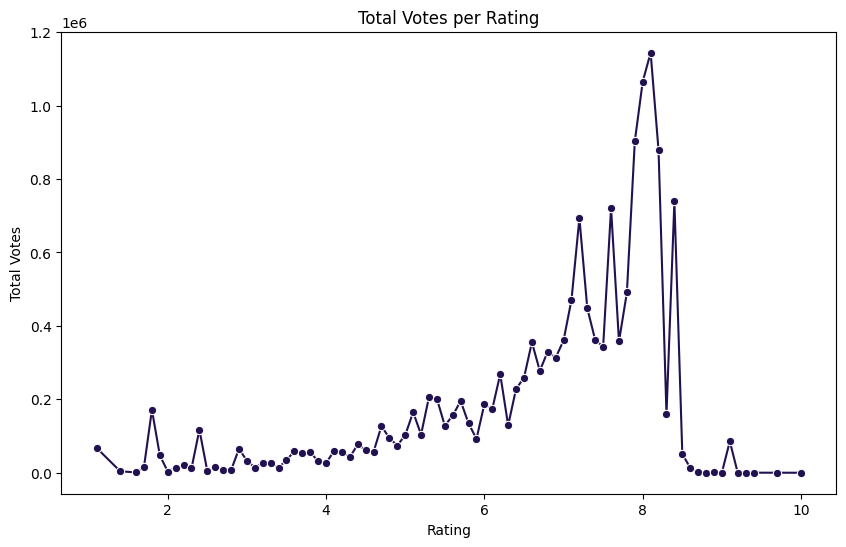

In [109]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

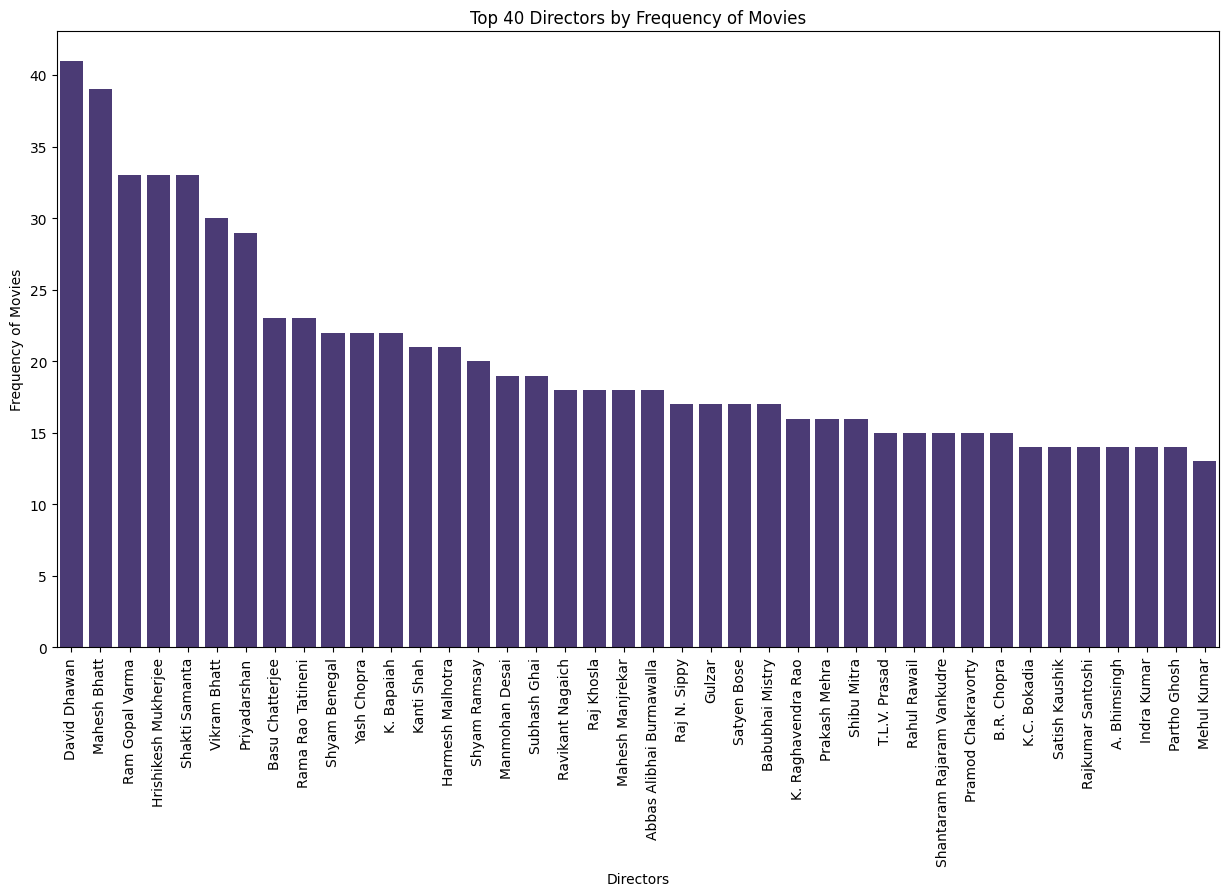

In [110]:
plt.figure(figsize=(15, 8))
sns.set_palette('viridis')
ax = sns.barplot(x=directors.head(40).index, y=directors.head(40).values)
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 40 Directors by Frequency of Movies')
plt.xticks(rotation=90)
plt.show()

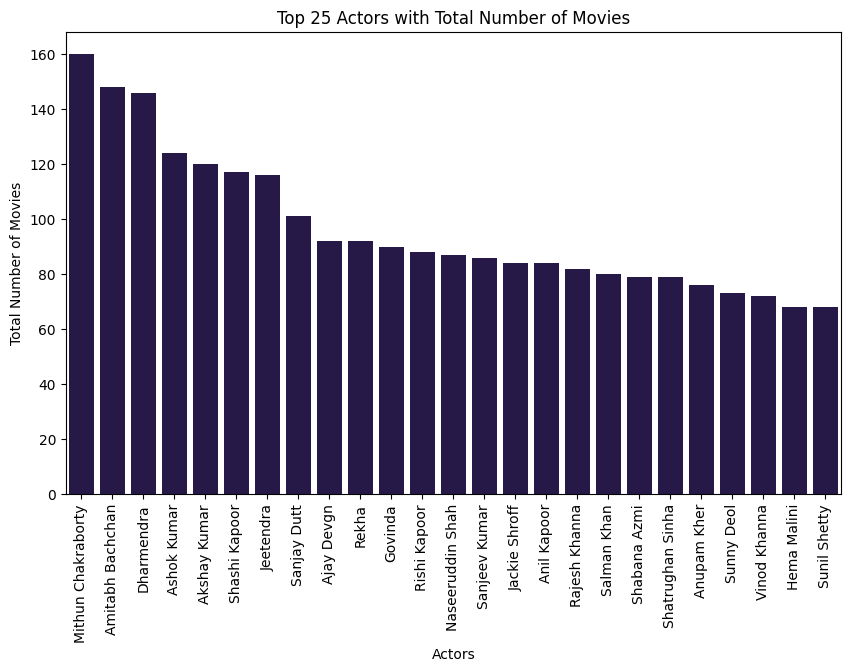

In [111]:
plt.figure(figsize=(10, 6))
sns.set_palette('magma')
ax = sns.barplot(x=actors.head(25).index, y=actors.head(25).values)
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 25 Actors with Total Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [112]:
columns_to_drop = ['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df.drop(columns_to_drop, axis=1)
y = df['Rating']

In [113]:
X.head(12)

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326
9,2014,116,11
10,2004,96,17
11,2016,120,59
12,1991,161,983
13,2012,166,512


In [114]:
y.head(12)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
15    7.4
18    6.3
Name: Rating, dtype: float64

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [121]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [122]:
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [125]:
y_linear_pred = linear_model.predict(x_test)
y_tree_pred = decision_tree_model.predict(x_test)

linear_mse = mean_squared_error(y_test, y_linear_pred)
linear_r2 = r2_score(y_test, y_linear_pred)

tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)
lr_preds = linear_model.predict(x_test)  

dt_preds = decision_tree_model.predict(x_test)

In [126]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("\n")

LRScore = evaluate_model(y_test, lr_preds, "Linear Regression")

DTScore = evaluate_model(y_test, dt_preds, "Decision Tree")

Model: Linear Regression
Mean Squared Error: 1.96
R-squared: -0.07


Model: Decision Tree
Mean Squared Error: 2.74
R-squared: -0.49




In [128]:
mse_lr = 1.96
r2_lr = -0.07
mse_dt = 2.74
r2_dt = -0.49

models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Decision Tree"],
        "MSE": [mse_lr, mse_dt],
        "R2": [r2_lr, r2_dt]
    }
)

print(models)

              MODELS   MSE    R2
0  Linear Regression  1.96 -0.07
1      Decision Tree  2.74 -0.49
